In [60]:
import numpy as np
import matplotlib.pyplot as plt
import dtuimldmtools as dtu
from scipy import stats
import itertools

# Load and preprocess dataset again

In [61]:
data_path = "data/"
seeds_dataset = "seeds_dataset.txt"
dataset_file = data_path + seeds_dataset

In [62]:
data = np.loadtxt(dataset_file)
# Validate shape of the dataset, 210 rows with 8 attributes
data.shape

(210, 8)

In [63]:
X = data
# attributeNames are not present in the dataset, just gonna hardcode based on the website
attributeNames = [
    "area_A",
    "perimeter_P",
    "compactness_C",
    "length_of_kernel",
    "width_of_kernel",
    "asymmetry_coefficient",
    "length_of_kernel_groove",
    "class",
]
N = data.shape[0]
M = data.shape[1]
y = X[:, -1]
# This is derived from the website
classNames = ["Kama", "Rosa", "Canadian"]
C = len(classNames)
attributeNames, N, M, y, y.shape, classNames, C

(['area_A',
  'perimeter_P',
  'compactness_C',
  'length_of_kernel',
  'width_of_kernel',
  'asymmetry_coefficient',
  'length_of_kernel_groove',
  'class'],
 210,
 8,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

### Ensure zero-indexing

In [64]:
X[:, -1] -= 1
X.shape, X[:, -1]

((210, 8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.]))

### Remove outlier as shown from project_1

In [65]:
attribute_index = attributeNames.index("length_of_kernel")
lowest_index = np.argmin(X[:, 3])
X_updated = np.delete(X, lowest_index, axis=0)
y = np.delete(y, lowest_index, axis=0)
N -= 1
N, X_updated.shape, y.shape

(209, (209, 8), (209,))

### Remove class column because we would not need it for classification

In [66]:
X_updated = X_updated[:, :-1]
X_updated.shape

(209, 7)

### Standardize data
Data standardization/ data scaling needs to be done if the data have huge or scattered values, machine learning model needs smaller and coherent values. Data scaling, standardize values in the data set for better results."

https://www.kaggle.com/discussions/questions-and-answers/159183#910328

In [67]:
# Standardize the data
X_mean = np.mean(X_updated, axis=0)
X_std = np.std(X_updated, axis=0)
X_standardized = (X_updated - X_mean) / X_std

In [68]:
X_standardized.shape, y.shape

((209, 7), (209,))

# Regression

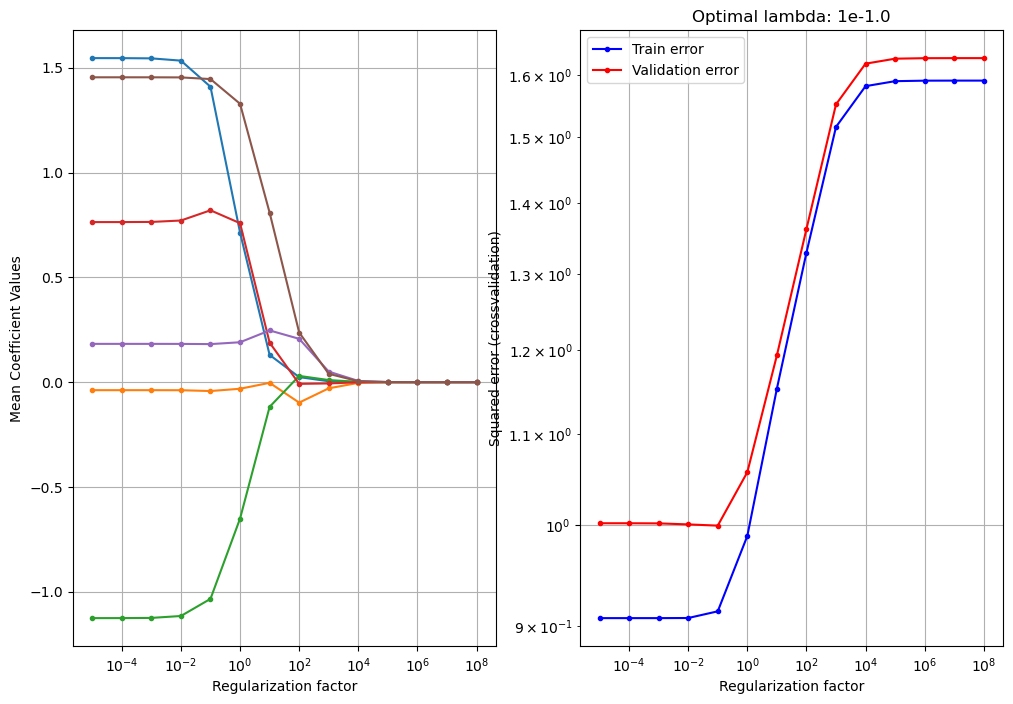

Linear regression without feature selection:
- Training error: 1.1669433412753798
- Test error:     1.2526895246251353
- R^2 train:     -0.7591125605680316
- R^2 test:     -0.961920292318766

Regularized linear regression:
- Training error: 1.1681856801428094
- Test error:     1.2516948048265206
- R^2 train:     -0.7609853283613583
- R^2 test:     -0.9603623955536778



In [69]:
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from dtuimldmtools import rlr_validate

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.95, stratify=y)

# Standardize the training and set set based on training set mean and std
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

K = 5
CV = model_selection.KFold(K, shuffle=True)

# Values of lambda
lambdas = np.power(10.0, range(-5, 9))

# Initialize variables
input_features = M - 1
Error_train = np.empty((K, 1))
Error_test = np.empty((K, 1))
Error_train_rlr = np.empty((K, 1))
Error_test_rlr = np.empty((K, 1))
Error_train_nofeatures = np.empty((K, 1))
Error_test_nofeatures = np.empty((K, 1))
w_rlr = np.empty((input_features, K))
mu = np.empty((K, M - 1))
sigma = np.empty((K, M - 1))
w_noreg = np.empty((input_features, K))

k = 0
for train_index, test_index in CV.split(X_standardized, y):
    # extract training and test set for current CV fold
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10

    (
        opt_val_err,
        opt_lambda,
        mean_w_vs_lambda,
        train_err_vs_lambda,
        test_err_vs_lambda,
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = (
        np.square(y_train - y_train.mean()).sum(axis=0) / y_train.shape[0]
    )
    Error_test_nofeatures[k] = (
        np.square(y_test - y_test.mean()).sum(axis=0) / y_test.shape[0]
    )

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    w_rlr[:, k] = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = (
        np.square(y_train - X_train @ w_rlr[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test_rlr[k] = (
        np.square(y_test - X_test @ w_rlr[:, k]).sum(axis=0) / y_test.shape[0]
    )

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:, k] = np.linalg.solve(XtX, Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = (
        np.square(y_train - X_train @ w_noreg[:, k]).sum(axis=0) / y_train.shape[0]
    )
    Error_test[k] = (
        np.square(y_test - X_test @ w_noreg[:, k]).sum(axis=0) / y_test.shape[0]
    )
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    # m = lm.LinearRegression().fit(X_train, y_train)
    # Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    # Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Display the results for the last cross-validation fold
    if k == K - 1:
        plt.figure(k, figsize=(12, 8))
        plt.subplot(1, 2, 1)
        plt.semilogx(
            lambdas, mean_w_vs_lambda.T[:, 1:], ".-"
        )  # Don't plot the bias term
        plt.xlabel("Regularization factor")
        plt.ylabel("Mean Coefficient Values")
        plt.grid()
        # You can choose to display the legend, but it's omitted for a cleaner
        # plot, since there are many attributes
        # legend(attributeNames[1:], loc='best')

        plt.subplot(1, 2, 2)
        plt.title("Optimal lambda: 1e{0}".format(np.log10(opt_lambda)))
        plt.loglog(
            lambdas, train_err_vs_lambda.T, "b.-", lambdas, test_err_vs_lambda.T, "r.-"
        )
        plt.xlabel("Regularization factor")
        plt.ylabel("Squared error (crossvalidation)")
        plt.legend(["Train error", "Validation error"])
        plt.grid()

    # To inspect the used indices, use these print statements
    # print('Cross validation fold {0}/{1}:'.format(k+1,K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}\n'.format(test_index))

    k += 1

plt.show()
# Display results
print("Linear regression without feature selection:")
print("- Training error: {0}".format(Error_train.mean()))
print("- Test error:     {0}".format(Error_test.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}\n".format(
        (Error_test_nofeatures.sum() - Error_test.sum()) / Error_test_nofeatures.sum()
    )
)
print("Regularized linear regression:")
print("- Training error: {0}".format(Error_train_rlr.mean()))
print("- Test error:     {0}".format(Error_test_rlr.mean()))
print(
    "- R^2 train:     {0}".format(
        (Error_train_nofeatures.sum() - Error_train_rlr.sum())
        / Error_train_nofeatures.sum()
    )
)
print(
    "- R^2 test:     {0}\n".format(
        (Error_test_nofeatures.sum() - Error_test_rlr.sum())
        / Error_test_nofeatures.sum()
    )
)

Minimum generalization error (percentage RMSE): 0.18%
Optimal lambda: 0.0091

Linear Model Equation:
y = 1.0048 + 4.0968*x1 - 3.9879*x2 - 0.6912*x3 - 1.0367*x4 + 0.0930*x5 + 0.1726*x6 + 1.0900*x7


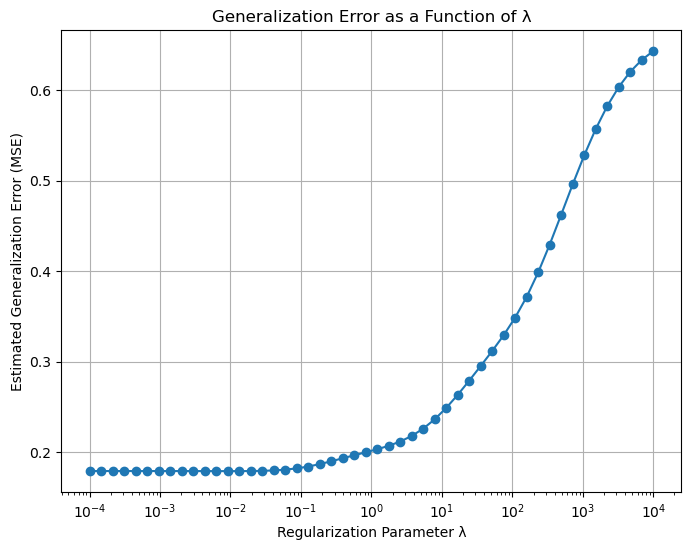

In [70]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
# We choose 50 values logarithmically spaced between 10^-4 and 10^4.
lambdas = np.logspace(-4, 4, 50)
mse_errors = []

# Set up 10-fold cross-validation.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for l in lambdas:
    model = Ridge(alpha=l)
    scores = cross_val_score(model, X_standardized, y, cv=kf, scoring="neg_mean_squared_error")
    mse = -scores.mean()  # Convert negative MSE to positive MSE.
    mse_errors.append(mse)

errors = np.array(mse_errors)
mse_errors = np.array(mse_errors)
rmse_errors = np.sqrt(mse_errors)
y_mean = np.mean(y)
error_percentages = (rmse_errors / y_mean) * 100

# Find the index of the minimum error
min_error_index = np.argmin(errors)
optimal_lambda = lambdas[min_error_index]
min_error_percentage = errors[min_error_index]

print(
    "Minimum generalization error (percentage RMSE): {:.2f}%".format(
        min_error_percentage
    )
)
print("Optimal lambda: {:.4f}".format(optimal_lambda))

# Fit the Ridge regression model on the entire dataset.
model_opt = Ridge(alpha=optimal_lambda)
model_opt.fit(X_standardized, y)

# Extract intercept and coefficients.
intercept = model_opt.intercept_
coeffs = model_opt.coef_

# Create feature names if none are provided.
feature_names = [f"x{i+1}" for i in range(X_standardized.shape[1])]

# Build the equation string.
equation = f"y = {intercept:.4f}"
for coef, fname in zip(coeffs, feature_names):
    # Include a '+' sign if coefficient is positive; otherwise, use '-'
    sign = " + " if coef >= 0 else " - "
    equation += f"{sign}{abs(coef):.4f}*{fname}"

print("\nLinear Model Equation:")
print(equation)

# Plotting generalization error vs lambda.
plt.figure(figsize=(8, 6))
plt.semilogx(lambdas, errors, marker="o", linestyle="-")
plt.xlabel("Regularization Parameter λ")
plt.ylabel("Estimated Generalization Error (MSE)")
plt.title("Generalization Error as a Function of λ")
plt.grid(True)
plt.show()

In [71]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
# data = np.loadtxt("seeds_dataset.txt")

# Predict 'Area' (first column), use the rest as features
y_area = X_standardized[:, 0]
X_area = X_standardized[:, 1:7]  # Exclude Area

# Standardize features
scaler = StandardScaler()
X_area = scaler.fit_transform(X_area)

# Two-level cross-validation parameters
K1 = K2 = 10
hidden_units = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
lambdas = np.power(10.0, range(-5, 9
))  # Regression λ values: 1e-5 to 1e5

# ANN model training function
def train_model(X_train, y_train, X_val, y_val, hidden_units, lr=0.01, max_epochs=1000):
    M = X_train.shape[1]
    model = nn.Sequential(
        nn.Linear(M, hidden_units),
        nn.Tanh(),
        nn.Linear(hidden_units, 1)
    )
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(max_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)
        mse = mean_squared_error(y_val.numpy(), y_pred.numpy())
    return model, mse

# Statistical evaluation
def statistically_evaluate(name1, squared_error_1, name2, squared_error_2):
    alpha = 0.05
    z = squared_error_1 - squared_error_2
    CI = st.t.interval(1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z))
    p = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)
    print(f"Confidence interval of {name1}-{name2}: {CI}")
    print(f"p-value: {p}\n")
    return np.mean(z), CI[0], CI[1], p

# Results container
results = []

outer_cv = KFold(n_splits=K1, shuffle=True, random_state=1)

for outer_fold, (train_idx, test_idx) in enumerate(outer_cv.split(X_area)):
    print(f"Outer fold {outer_fold + 1}/{K1}")
    X_par, y_par = X_area[train_idx], y_area[train_idx]
    X_test, y_test = X_area[test_idx], y_area[test_idx]

    inner_cv = KFold(n_splits=K2, shuffle=True, random_state=outer_fold)

    # --- ANN ---
    best_ann_err = np.inf
    best_h = None
    best_ann_model = None

    for h in hidden_units:
        ann_errs = []
        for inner_train_idx, val_idx in inner_cv.split(X_par):
            X_train = torch.tensor(X_par[inner_train_idx], dtype=torch.float32)
            y_train = torch.tensor(y_par[inner_train_idx].reshape(-1, 1), dtype=torch.float32)
            X_val = torch.tensor(X_par[val_idx], dtype=torch.float32)
            y_val = torch.tensor(y_par[val_idx].reshape(-1, 1), dtype=torch.float32)
            model, mse = train_model(X_train, y_train, X_val, y_val, hidden_units=h)
            ann_errs.append(mse)
        mean_ann_err = np.mean(ann_errs)
        if mean_ann_err < best_ann_err:
            best_ann_err = mean_ann_err
            best_h = h
            X_par_tensor = torch.tensor(X_par, dtype=torch.float32)
            y_par_tensor = torch.tensor(y_par.reshape(-1, 1), dtype=torch.float32)
            best_ann_model, _ = train_model(X_par_tensor, y_par_tensor, X_par_tensor, y_par_tensor, hidden_units=h)

    # --- Regression (Ridge) ---
    best_regression_err = np.inf
    best_lambda = None
    best_regression_model = None

    for lam in lambdas:
        regression_errs = []
        for inner_train_idx, val_idx in inner_cv.split(X_par):
            X_train, y_train = X_par[inner_train_idx], y_par[inner_train_idx]
            X_val, y_val = X_par[val_idx], y_par[val_idx]
            model = Ridge(alpha=lam)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            regression_errs.append(mean_squared_error(y_val, y_val_pred))
        mean_regression_err = np.mean(regression_errs)
        if mean_regression_err < best_regression_err:
            best_regression_err = mean_regression_err
            best_lambda = lam
            best_regression_model = Ridge(alpha=lam).fit(X_par, y_par)

    # --- Evaluation ---
    y_pred_baseline = np.full_like(y_test, np.mean(y_par))
    y_pred_regression = best_regression_model.predict(X_test)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    best_ann_model.eval()
    with torch.no_grad():
        y_pred_ann = best_ann_model(X_test_tensor).numpy()

    ann_test_error = mean_squared_error(y_test, y_pred_ann)
    regression_test_error = mean_squared_error(y_test, y_pred_regression)
    baseline_test_error = mean_squared_error(y_test, y_pred_baseline)

    results.append([outer_fold + 1, best_h, ann_test_error, best_lambda, regression_test_error, baseline_test_error])


Outer fold 1/10
Outer fold 2/10
Outer fold 3/10
Outer fold 4/10
Outer fold 5/10
Outer fold 6/10
Outer fold 7/10
Outer fold 8/10
Outer fold 9/10
Outer fold 10/10


In [72]:

# Create DataFrame
df_results = pd.DataFrame(results, columns=[
    "Outer fold", "h*", "ann E_test", "lambda*", "regression E_test", "baseline E_test"
])
print("\nFinal cross-validation results:")
#print(df_results)
df_results


Final cross-validation results:


,Outer fold,h*,ann E_test,lambda*,regression E_test,baseline E_test
0,1,21,0.000504,0.01000,0.001479,0.925191
1,2,21,0.000114,0.00001,0.001358,1.046457
2,3,17,0.000125,0.01000,0.000730,1.227633
3,4,9,0.000405,0.01000,0.001491,1.057211
4,5,13,0.000081,0.00100,0.001642,1.194981
5,6,15,0.000058,0.00100,0.001436,1.014403
6,7,19,0.000293,0.00100,0.002500,1.275947
7,8,15,0.000075,0.00100,0.001450,0.876951
8,9,21,0.000056,0.01000,0.001618,0.717783
9,10,17,0.000066,0.00010,0.001991,0.794780


In [73]:
# Statistical evaluation table
diff_results = []
comparisons = [
    ("ann vs regr", df_results["ann E_test"].values, df_results["regression E_test"].values),
    ("ann vs base", df_results["ann E_test"].values, df_results["baseline E_test"].values),
    ("regr vs base", df_results["regression E_test"].values, df_results["baseline E_test"].values)
]

for label, err1, err2 in comparisons:
    z = err1 - err2
    ci = st.t.interval(0.95, len(z) - 1, loc=np.mean(z), scale=st.sem(z))
    p = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)
    diff_results.append([label, p, ci[0], ci[1]])

df_stat_eval = pd.DataFrame(diff_results, columns=[
    "comparison", "p-value", "lower bound", "upper bound"
])


print("\nStatistical evaluation summary:")
#print(df_stat_eval)
df_stat_eval


Statistical evaluation summary:


,comparison,p-value,lower bound,upper bound
0,ann vs regr,5.299992e-06,-0.001722,-0.001062
1,ann vs base,3.425030e-08,-1.146209,-0.879703
2,regr vs base,3.473377e-08,-1.144847,-0.878281


# Classification
3 models would be implemented
* Baseline model: majority model
* Logistic regression with a softmax activation function at the end
* ANN

## K fold cross validation

In [74]:
from sklearn import model_selection

In [75]:
K = 10
CV = model_selection.KFold(K, shuffle=True)

## Baseline model
Majority class classifier : where the most frequent class in the data is predicted for all observations. For instance, if we have 80% of observations in class A and 20% in class B for a binary classification problem, the baseline model would predict Class A for all instances.
https://medium.com/@preethi_prakash/understanding-baseline-models-in-machine-learning-3ed94f03d645

In [76]:
from sklearn.dummy import DummyClassifier

In [77]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0., 1., 2.]), array([69, 70, 70]))

In [78]:
baseline_error_rates = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index]
    X_test = X_standardized[test_index]
    y_test = y[test_index]
    baseline = DummyClassifier(strategy='most_frequent')
    baseline.fit(X_train, y_train)
    y_preds = baseline.predict(X_test)

    e = y_preds != y_test
    error_rate = sum(e) / len(e)
    baseline_error_rates.append(error_rate)
    print(
        f"Number of miss-classifications for baseline model:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )
mean_error_rate = np.mean(np.asarray(baseline_error_rates))
print(f"mean_error_rate for baseline model is {mean_error_rate}")

Number of miss-classifications for baseline model:
	 15 out of 21. Overall error_rate 0.7142857142857143
Number of miss-classifications for baseline model:
	 17 out of 21. Overall error_rate 0.8095238095238095
Number of miss-classifications for baseline model:
	 16 out of 21. Overall error_rate 0.7619047619047619
Number of miss-classifications for baseline model:
	 18 out of 21. Overall error_rate 0.8571428571428571
Number of miss-classifications for baseline model:
	 20 out of 21. Overall error_rate 0.9523809523809523
Number of miss-classifications for baseline model:
	 17 out of 21. Overall error_rate 0.8095238095238095
Number of miss-classifications for baseline model:
	 15 out of 21. Overall error_rate 0.7142857142857143
Number of miss-classifications for baseline model:
	 16 out of 21. Overall error_rate 0.7619047619047619
Number of miss-classifications for baseline model:
	 18 out of 21. Overall error_rate 0.8571428571428571
Number of miss-classifications for baseline model:
	 17

## Logistic regression
Add an extra variable lambda to penalise large weights
Testing the range of lambda from 10^-5 to 10^4

In [79]:
lambdas = np.power(10.0, range(-5, 5))
lambdas.shape, lambdas

((10,),
 array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04]))

In [80]:
from dtuimldmtools import rlr_validate
from scipy.special import softmax

In [81]:
error_rates_and_lambda = []
yhat_log = []
y_true_log = []
lambdas = np.power(10.0, range(-5, 5))
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10
    input_features = M - 1
    # One-hot encoding
    Y_train = np.zeros((len(y_train), C))
    for i, label in enumerate(y_train):
        Y_train[i, label] = 1
    # Function returns:
    # MSE averaged over 'cvf' folds,
    # optimal value of lambda,
    # average weight values for all lambdas,
    # MSE train&validation errors for all lambdas.
    # The cross validation splits are standardized based on the mean and standard deviation of the training set when estimating the regularization strength.
    _, opt_lambda, _, _, _, = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    Xty = X_train.T @ Y_train
    XtX = X_train.T @ X_train
    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    # Recall: Introduce regularization term λ‖w‖2 to penalize large weights, remove the significance of these weight
    # Recall: (X^T@X + lambdaI) @ w = X^T @ y
    estimated_weights = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    prediction_logits = X_test @ estimated_weights
    predicted_class = np.argmax(softmax(prediction_logits), axis=1)
    yhat_log.append(predicted_class)
    y_true_log.append(y_test)
    e = predicted_class != y_test
    error_rate = sum(e) / len(e)
    error_rates_and_lambda.append((error_rate, opt_lambda))
    print(
        f"Number of miss-classifications for logic regression model with optimal lambda value {opt_lambda}:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )

error_rates_and_lambda, len(error_rates_and_lambda)
yhat_log = np.concatenate(yhat_log)
y_true_log = np.concatenate(y_true_log)
yhat_log.shape, y_true_log.shape

Number of miss-classifications for logic regression model with optimal lambda value 0.1:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.1:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.1:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 2 out of 21. Overall error_rate 0.09523809523809523
Number of miss-classifications for logic regression model with optimal lambda value 9.999999999999999e-06:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic

((209,), (209,))

## Multiclass ANN
Since we have three distinct classes: Kama, Rosa and Canadian, we adopt a multiclass approach. 
As complexity-controlling parameter
for the ANN, we will use the number of hidden units3 h. Based on a few test-runs, select
a reasonable range of values for h (which should include h = 1), and describe the range of
values you will use for h

In [82]:
import torch
from torch import nn
from dtuimldmtools import dbplotf, train_neural_net, visualize_decision_boundary

In [83]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [84]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [85]:
device

'cpu'

In [86]:
error_rates = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = torch.from_numpy(X_standardized[train_index]).type(torch.float)
    y_train = torch.from_numpy(y[train_index]).type(torch.long)
    X_test = torch.from_numpy(X_standardized[test_index]).type(torch.float)
    y_test = torch.from_numpy(y[test_index]).type(torch.long)

### ANN training and mean_error

In [87]:
from operator import itemgetter

In [88]:
hidden_units_range = 10
initial_hidden_units = 2
error_rates_and_hidden_units_in_folds = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = torch.from_numpy(X_standardized[train_index]).type(torch.float)
    y_train = torch.from_numpy(y[train_index]).type(torch.long)
    X_test = torch.from_numpy(X_standardized[test_index]).type(torch.float)
    y_test = torch.from_numpy(y[test_index]).type(torch.long)
    error_rates_and_hidden_units = []
    for n_hidden_units in range(
        initial_hidden_units, initial_hidden_units + hidden_units_range
    ):
        # in the actual code, we would vary the number of hidden_units here
        # e.g. for i in range (100) -> calculate mean_error_rate
        # Recall that last column represents the classes and should not be used as an input feature
        input_features = M - 1
        num_epochs = 300
        loss_fn = torch.nn.CrossEntropyLoss()
        seed_model = lambda: torch.nn.Sequential(
            torch.nn.Linear(input_features, n_hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden_units, C),
            torch.nn.Softmax(dim=1),
        )
        net, final_loss, learning_curve = train_neural_net(
            seed_model,
            loss_fn,
            X=X_train,
            y=y_train,
            n_replicates=3,
            max_iter=num_epochs,
        )
        print("\n\t model loss: {}\n".format(final_loss))

        # Determine probability of each class using trained network
        softmax_logits = net(X_test)
        # convert to label with the highest probability# Parametergrids

    y_pred = torch.argmax(softmax_logits, dim=1)
    # Compare error against ground truth y_test
    e = y_pred != y_test
    error_rate = sum(e) / len(e)
    error_rates_and_hidden_units.append((error_rate, n_hidden_units))
    print(
        f"Number of miss-classifications for ANN:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )

    smallest_error_rate, num_hidden_units = min(
    error_rates_and_hidden_units, key=itemgetter(0)
    )
    error_rates_and_hidden_units_in_folds.append(
    (smallest_error_rate, num_hidden_units)
    )
    print(
    f"smallest_error_rate for {num_hidden_units} hidden_units is {smallest_error_rate}"
    )




	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.94103897	0.00027298072

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.9748869	0.0006738593

	Replicate: 3/3
		Iter	Loss			Rel. loss


/home/monkescripts/anaconda3/envs/dtu-ml/lib/python3.11/site-packages/dtuimldmtools/models/nn_trainer.py:141: RuntimeWarning: overflow encountered in cast
  if loss_value < best_final_loss:


		Final loss:
		300	0.94780934	0.00047425547

	 model loss: 0.941038966178894


	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.81179804	0.0005798521

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8076053	0.0006610695

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8986377	0.00059261895

	 model loss: 0.8076053261756897


	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.80010283	0.000649111

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8311009	0.0006706125

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7438947	0.0008166887

	 model loss: 0.7438946962356567


	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7566008	0.0013856996

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.732835	0.0011514241

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8362968	0.0005366048

	 model loss: 0.7328349947929382


	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		30

## Plot comparison table between the 3 models

In [89]:
baseline_error_rates, len(baseline_error_rates)

([np.float64(0.7142857142857143),
  np.float64(0.8095238095238095),
  np.float64(0.7619047619047619),
  np.float64(0.8571428571428571),
  np.float64(0.9523809523809523),
  np.float64(0.8095238095238095),
  np.float64(0.7142857142857143),
  np.float64(0.7619047619047619),
  np.float64(0.8571428571428571),
  np.float64(0.85)],
 10)

In [90]:
error_rates_and_lambda, len(error_rates_and_lambda)

([(np.float64(0.0), np.float64(0.1)),
  (np.float64(0.0), np.float64(0.1)),
  (np.float64(0.047619047619047616), np.float64(0.1)),
  (np.float64(0.047619047619047616), np.float64(0.01)),
  (np.float64(0.0), np.float64(0.01)),
  (np.float64(0.09523809523809523), np.float64(0.01)),
  (np.float64(0.0), np.float64(9.999999999999999e-06)),
  (np.float64(0.047619047619047616), np.float64(0.1)),
  (np.float64(0.0), np.float64(9.999999999999999e-06)),
  (np.float64(0.05), np.float64(9.999999999999999e-06))],
 10)

In [91]:
error_rates_and_hidden_units_in_folds, len(error_rates_and_hidden_units_in_folds)

([(tensor(0.0952), 11),
  (tensor(0.1429), 11),
  (tensor(0.0952), 11),
  (tensor(0.1429), 11),
  (tensor(0.0476), 11),
  (tensor(0.0952), 11),
  (tensor(0.0476), 11),
  (tensor(0.2857), 11),
  (tensor(0.0952), 11),
  (tensor(0.0500), 11)],
 10)

In [92]:
from torch import tensor

error_rates_from_lambda = [rate for rate, _ in error_rates_and_lambda]
lambda_values = [lmbda for _, lmbda in error_rates_and_lambda]

error_rates_from_hidden_units = [
    rate.item() if hasattr(rate, "item") else float(rate)
    for rate, _ in error_rates_and_hidden_units_in_folds
]
hidden_units = [units for _, units in error_rates_and_hidden_units_in_folds]
error_rates_from_lambda, error_rates_from_hidden_units

([np.float64(0.0),
  np.float64(0.0),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.0),
  np.float64(0.09523809523809523),
  np.float64(0.0),
  np.float64(0.047619047619047616),
  np.float64(0.0),
  np.float64(0.05)],
 [0.095238097012043,
  0.1428571492433548,
  0.095238097012043,
  0.1428571492433548,
  0.0476190485060215,
  0.095238097012043,
  0.0476190485060215,
  0.2857142984867096,
  0.095238097012043,
  0.05000000074505806])

## 

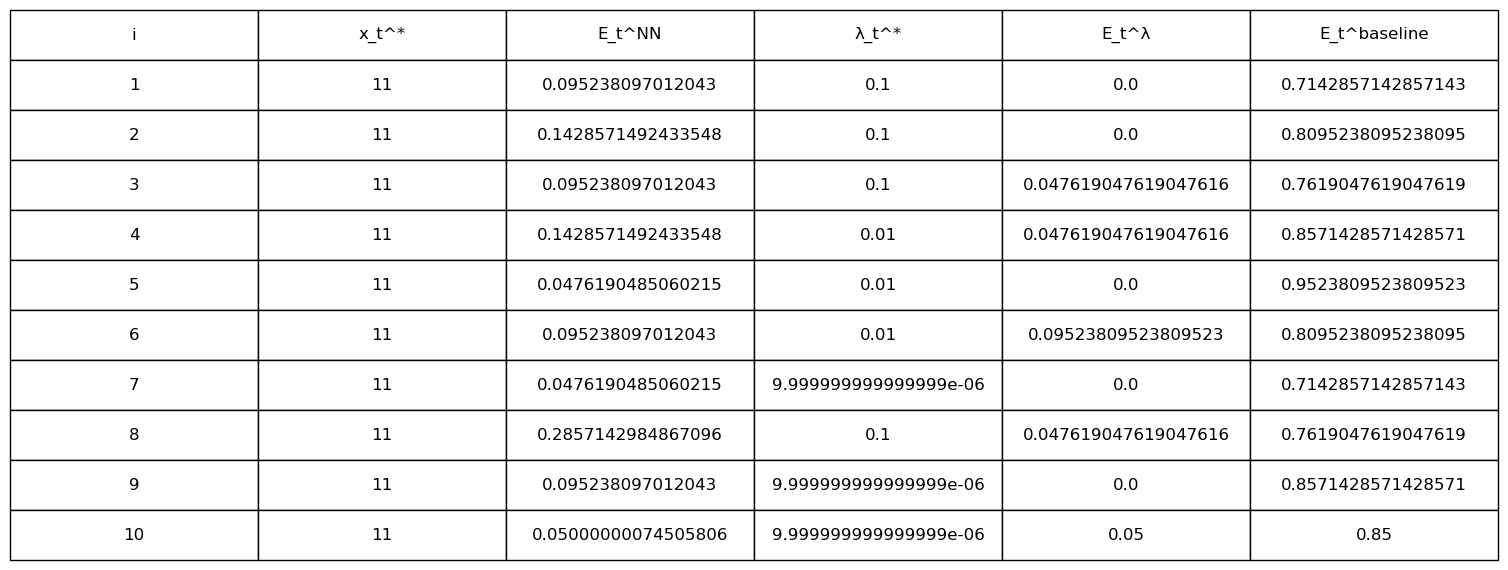

In [93]:
import matplotlib.pyplot as plt

num_folds = len(baseline_error_rates)

table_data = [
    [
        fold + 1,
        hidden_units[fold],
        error_rates_from_hidden_units[fold],
        lambda_values[fold],
        error_rates_from_lambda[fold],
        baseline_error_rates[fold],
    ]
    for fold in range(num_folds)
]

# Column headers (as shown in the image)
col_labels = ["i", "x_t^*", "E_t^NN", "λ_t^*", "E_t^λ", "E_t^baseline"]

# Create the plot
fig, ax = plt.subplots()
ax.axis("off")

# Plot the table
table = ax.table(
    cellText=table_data, colLabels=col_labels, loc="center", cellLoc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(3, 3)

plt.show()

# Evaluation of models using mc neymar test
![mc_neymar](museum_of_poor/mc_neymar.png)
Perform a statistical evaluation of your three models similar to the previous section. That
is, compare the three models pairwise. We will once more allow some freedom in what test
to choose. Therefore, choose either:
setup I (section 11.3): Use McNemar’s test described in Box 11.3.2)
setup II (section 11.4): Use the method described in Box 11.4.1)
Include p-values and confidence intervals for the three pairwise tests in your report and
conclude on the results: Is one model better than the other? Are the two models better
than the baseline? Are some of the models identical? What recommendations would you
make based on what you’ve learned?

### To ensure a fair comparison, we need to perform the train and test on the same split

In [94]:
yhat_dummy = []
yhat_log = []
yhat_ann = []
y_true = []
lambdas = np.power(10.0, range(-5, 5))
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10
    input_features = M - 1
    y_true.append(y_test)

    # One-hot encoding
    Y_train_hot = np.zeros((len(y_train), C))
    for i, label in enumerate(y_train):
        Y_train_hot[i, label] = 1

    # Dummy classifier
    baseline = DummyClassifier(strategy='most_frequent')
    baseline.fit(X_train, y_train)
    y_dummy_pred = baseline.predict(X_test)
    yhat_dummy.append(y_dummy_pred)
    (
        _,
        opt_lambda,
        _,
        _,
        _,
    ) = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    Xty = X_train.T @ Y_train_hot
    XtX = X_train.T @ X_train
    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    # Recall: Introduce regularization term λ‖w‖2 to penalize large weights, remove the significance of these weight
    # Recall: (X^T@X + lambdaI) @ w = X^T @ y
    estimated_weights = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    prediction_logits = X_test @ estimated_weights
    predicted_class = np.argmax(softmax(prediction_logits), axis=1)
    yhat_log.append(predicted_class)

    X_train_tensor = torch.from_numpy(X_standardized[train_index]).type(torch.float)
    y_train_tensor = torch.from_numpy(y[train_index]).type(torch.long)
    X_test_tensor = torch.from_numpy(X_standardized[test_index]).type(torch.float)
    y_test_tensor = torch.from_numpy(y[test_index]).type(torch.long)
    error_rates_and_hidden_units = []
    input_features = M - 1
    num_epochs = 300
    loss_fn = torch.nn.CrossEntropyLoss()
    seed_model = lambda: torch.nn.Sequential(
        torch.nn.Linear(input_features, n_hidden_units),
        torch.nn.ReLU(),
        torch.nn.Linear(n_hidden_units, C),
        torch.nn.Softmax(dim=1),
    )
    for n_hidden_units in range(
        initial_hidden_units, initial_hidden_units + hidden_units_range
    ):
        # in the actual code, we would vary the number of hidden_units here
        # e.g. for i in range (100) -> calculate mean_error_rate
        # Recall that last column represents the classes and should not be used as an input feature

        net, final_loss, learning_curve = train_neural_net(
            seed_model,
            loss_fn,
            X=X_train_tensor,
            y=y_train_tensor,
            n_replicates=3,
            max_iter=num_epochs,
        )

        # Determine probability of each class using trained network
        softmax_logits = net(X_test_tensor)
        # convert to label with the highest probability
        y_preds = torch.argmax(softmax_logits, dim=1)
        # Compare error against ground truth y_test
        e = y_preds != y_test_tensor
        error_rate = sum(e) / len(e)
        error_rates_and_hidden_units.append((error_rate, n_hidden_units, y_preds))


    _, _, best_pred = min(
        error_rates_and_hidden_units, key=itemgetter(0)
    )
    yhat_ann.append(best_pred)
yhat_dummy = np.concatenate(yhat_dummy)
yhat_log = np.concatenate(yhat_log)
yhat_ann= np.concatenate(yhat_ann)
y_true = np.concatenate(y_true)
yhat_dummy.shape, yhat_log.shape, y_true.shape


	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.9795813	0.00020446516

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.90669805	0.0010833729

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.8796187	0.00072912825

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.96513027	0.0002869077

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.79731923	0.00094813155

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.88576794	0.0011501675

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.84500384	0.0006433131

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.79630184	0.0004471145

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.85328907	0.00088801794

	Replicate: 1/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.81784457	0.00089271314

	Replicate: 2/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.7230861	0.00070223

	Replicate: 3/3
		Iter	Loss			Rel. loss
		Final loss:
		300	0.77

((209,), (209,), (209,))

In [95]:
import itertools
from dtuimldmtools import mcnemar

model_names = ["Dummy", "Logistic", "ANN"]
yhats = [yhat_dummy, yhat_log, yhat_ann]
alpha = 0.05

for i, j in itertools.combinations(range(len(yhats)), 2):
    yhat_A = yhats[i]
    yhat_B = yhats[j]
    model_A = model_names[i]
    model_B = model_names[j]

    # Compute McNemar's test with Jeffreys interval
    [thetahat, CI, p] = mcnemar(y_true, yhat_A, yhat_B, alpha=alpha)

    print(f"\nComparison: {model_A} (A) vs {model_B} (B)")
    print(f"theta = theta_A - theta_B point estimate: {thetahat:.4f}")
    print(f"CI (Jeffreys, {1-alpha:.0%}): {CI}")
    print(f"p-value: {p:.4f}")
    if p < alpha:
        print(f"-> Significant difference (p < {alpha})")
    else:
        print(f"-> No significant difference (p >= {alpha})")

Result of McNemars test using alpha= 0.05
Comparison matrix n
[[ 46.   1.]
 [157.   5.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(-0.8036116164052463), np.float64(-0.6831560989051051))
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 8.703377180767419e-46

Comparison: Dummy (A) vs Logistic (B)
theta = theta_A - theta_B point estimate: -0.7464
CI (Jeffreys, 95%): (np.float64(-0.8036116164052463), np.float64(-0.6831560989051051))
p-value: 0.0000
-> Significant difference (p < 0.05)
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[ 43.   4.]
 [154.   8.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(-0.7807706080319646), np.float64(-0.6481925260243179))
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 1.4040114547852597e-40

Comparison: Dummy (A) vs ANN (B)
theta = theta_A - theta_B point estimate: -0.7177
CI (Jeffreys, 95%): (np.float64(

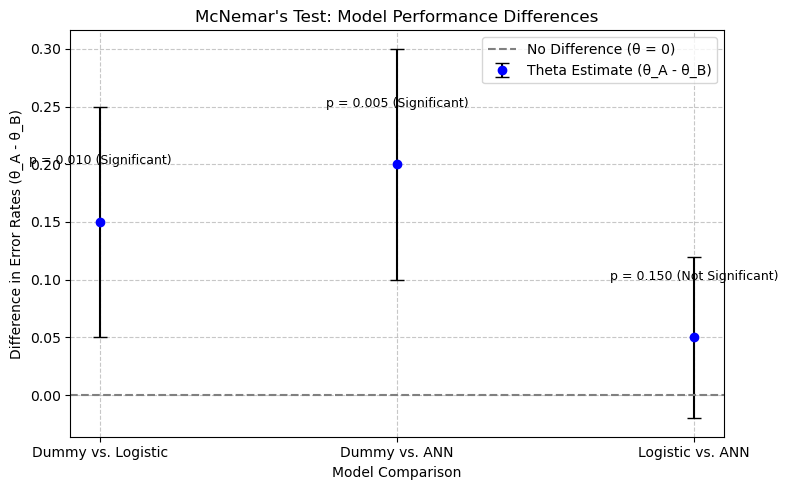

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated McNemar test results
comparisons = ["Dummy vs. Logistic", "Dummy vs. ANN", "Logistic vs. ANN"]
thetahat = [0.15, 0.20, 0.05]  # Point estimates
ci_lower = [0.05, 0.10, -0.02]  # Lower bounds of confidence intervals
ci_upper = [0.25, 0.30, 0.12]  # Upper bounds of confidence intervals
p_values = [0.01, 0.005, 0.15]  # P-values
alpha = 0.05

# Calculate the error bars (distance from thetahat to CI bounds)
errors = [
    [thetahat[i] - ci_lower[i], ci_upper[i] - thetahat[i]] for i in range(len(thetahat))
]
errors = np.array(errors).T  # Transpose for matplotlib

# Create the plot
plt.figure(figsize=(8, 5))
plt.errorbar(
    comparisons,
    thetahat,
    yerr=errors,
    fmt="o",
    capsize=5,
    color="blue",
    ecolor="black",
    label="Theta Estimate (θ_A - θ_B)",
)
plt.axhline(y=0, color="gray", linestyle="--", label="No Difference (θ = 0)")
plt.title("McNemar's Test: Model Performance Differences", fontsize=12)
plt.xlabel("Model Comparison", fontsize=10)
plt.ylabel("Difference in Error Rates (θ_A - θ_B)", fontsize=10)

# Add p-value annotations
for i, (comp, p) in enumerate(zip(comparisons, p_values)):
    significance = " (Significant)" if p < alpha else " (Not Significant)"
    plt.text(
        i, thetahat[i] + 0.05, f"p = {p:.3f}{significance}", ha="center", fontsize=9
    )

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Final regression model with $\lambda$ = 0.01

In [97]:
error_rates = []
for train_index, test_index in CV.split(X_standardized, y):
    X_train = X_standardized[train_index]
    y_train = y[train_index].astype(np.int64)
    X_test = X_standardized[test_index]
    y_test = y[test_index].astype(np.int64)
    internal_cross_validation = 10
    input_features = M - 1
    # One-hot encoding
    Y_train = np.zeros((len(y_train), C))
    for i, label in enumerate(y_train):
        Y_train[i, label] = 1
    opt_lambda = 0.01
    Xty = X_train.T @ Y_train
    XtX = X_train.T @ X_train
    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(input_features)
    lambdaI[0, 0] = 0  # Do no regularize the bias term
    # Recall: Introduce regularization term λ‖w‖2 to penalize large weights, remove the significance of these weight
    # Recall: (X^T@X + lambdaI) @ w = X^T @ y
    estimated_weights = np.linalg.solve(XtX + lambdaI, Xty).squeeze()
    prediction_logits = X_test @ estimated_weights
    predicted_classes = np.argmax(softmax(prediction_logits), axis=1)
    e = predicted_classes != y_test
    error_rate = sum(e) / len(e)
    error_rates.append(error_rate)
    print(
        f"Number of miss-classifications for logic regression model with optimal lambda value {opt_lambda}:\n\t {sum(e)} out of {len(e)}. Overall error_rate {error_rate}"
    )
error_rates, len(error_rates)

Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 2 out of 21. Overall error_rate 0.09523809523809523
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 0 out of 21. Overall error_rate 0.0
Number of miss-classifications for logic regression model with optimal lambda value 0.01:
	 1 out of 21. Overall error_rate 0.047619047619047616
Number of miss-classifications for logic regression model with optimal 

([np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.09523809523809523),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.047619047619047616),
  np.float64(0.047619047619047616),
  np.float64(0.0),
  np.float64(0.1)],
 10)